In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              221 non-null    object 
 1   OAS                               205 non-null    float64
 2   Excess Return % 3-mo (Treasury)   221 non-null    float64
 3   Excess Return % 3-mo (Agg)        221 non-null    float64
 4   Excess Return % 6-mo (Treasury)   221 non-null    float64
 5   Excess Return % 6-mo (Agg)        221 non-null    float64
 6   Excess Return % 9-mo (Treasury)   221 non-null    float64
 7   Excess Return % 9-mo (Agg)        221 non-null    float64
 8   Excess Return % 12-mo (Treasury)  221 non-null    float64
 9   Excess Return % 12-mo (Agg)       221 non-null    float64
 10  Excess Return % 24-mo (Treasury)  221 non-null    float64
 11  Excess Return % 24-mo (Agg)       221 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6081131682000003


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.763845,0.568039,0.518653,0.571953,0.479309,0.570996,0.462457,0.571975,0.438932,0.555360,0.377734,0.633219,0.407947,3.024390
std,0.102946,0.282179,0.310107,0.312485,0.351835,0.274512,0.318317,0.280363,0.339490,0.240661,0.357633,0.273980,0.349516,0.907959
min,0.624090,0.000000,0.000000,0.000000,0.000000,0.129939,0.000000,0.130558,0.000000,0.088057,0.000000,0.190742,0.000000,1.000000
25%,0.680674,0.371224,0.234802,0.300097,0.178992,0.349828,0.205926,0.379828,0.155131,0.368590,0.000000,0.419076,0.075289,2.000000
50%,0.748908,0.614718,0.556558,0.564140,0.424561,0.492095,0.341257,0.478354,0.339292,0.495659,0.286134,0.612914,0.336879,3.000000
75%,0.820470,0.768072,0.729064,0.887403,0.831490,0.855857,0.798169,0.853179,0.765324,0.745679,0.667997,0.888930,0.688370,4.000000
max,0.983566,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 3-mo (Treasury)  41.0  0.568039  0.282179  0.044069   
 2                         combined  82.0  0.665942  0.232933  0.025723   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.478972  0.657106  
 2   0.614761  0.717123  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.1958
 1                              Degrees of freedom =   80.0000
 2                                               t =    4.1741
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.9219
 7                                       Hedge's g =    0.9132
 8                        

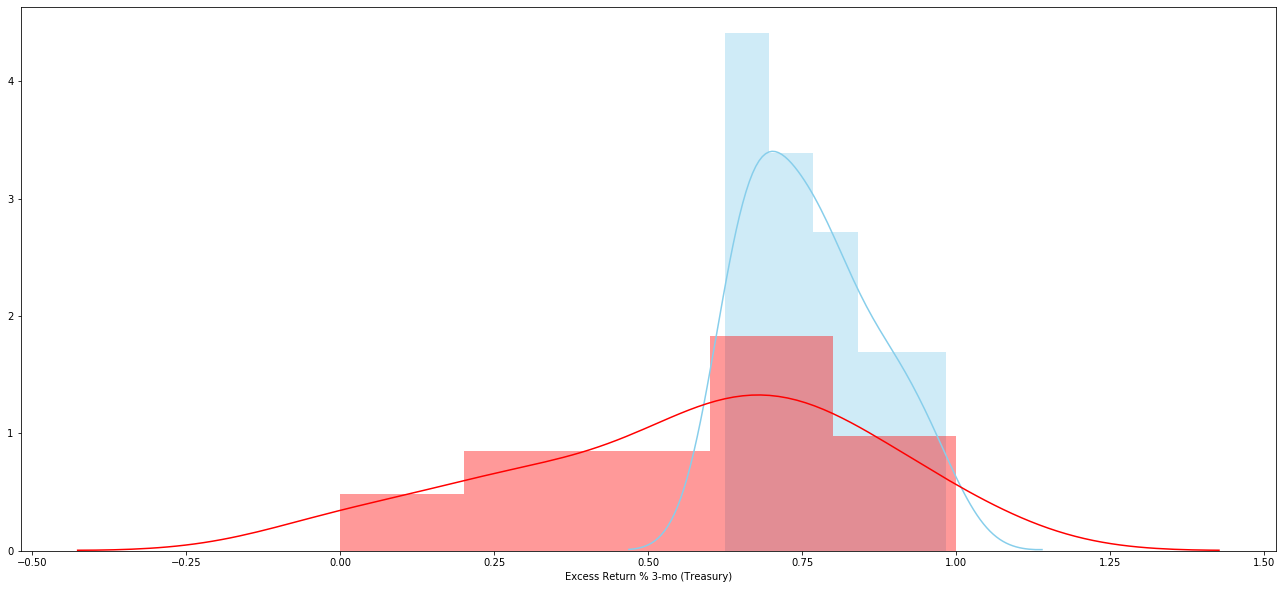

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 3-mo (Agg)  41.0  0.518653  0.310107  0.048431   0.420771   
 2                    combined  82.0  0.641249  0.260650  0.028784   0.583978   
 
    Interval  
 0  0.796339  
 1  0.616535  
 2  0.698520  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.2452
 1                             Degrees of freedom =   80.0000
 2                                              t =    4.8049
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0612
 7                                      Hedge's g =    1.0512
 8                                  Glass's delta =    

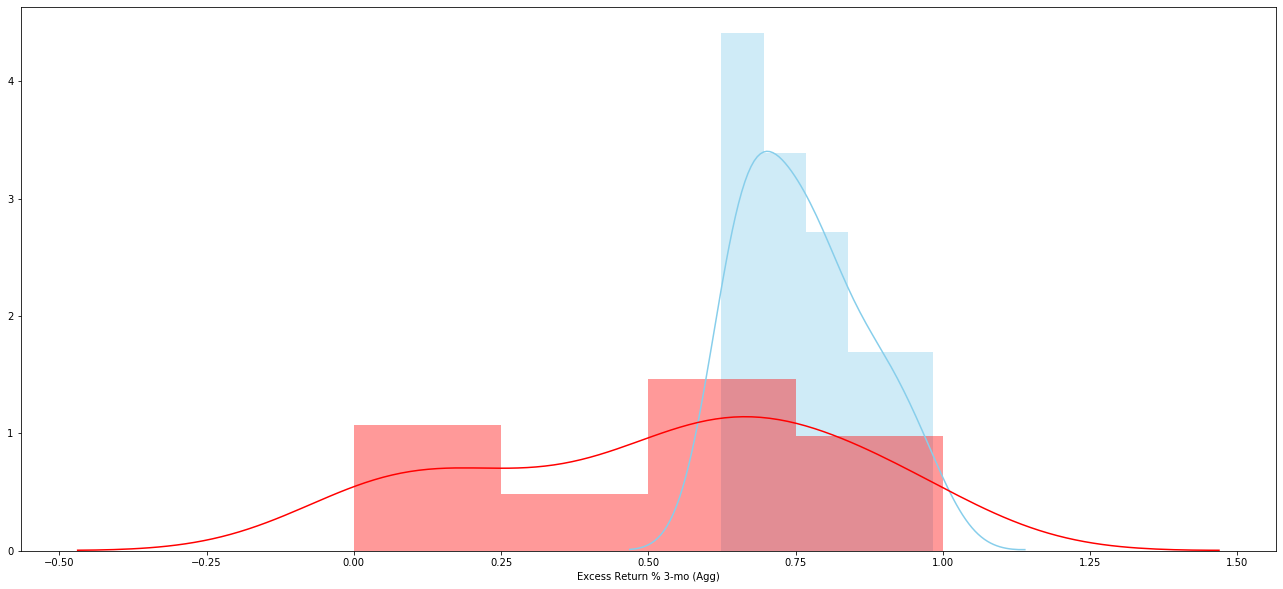

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 6-mo (Treasury)  41.0  0.571953  0.312485  0.048802   
 2                         combined  82.0  0.667899  0.250546  0.027668   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.473320  0.670585  
 2   0.612848  0.722950  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1919
 1                              Degrees of freedom =   80.0000
 2                                               t =    3.7346
 3                           Two side test p value =    0.0004
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.8248
 7                                       Hedge's g =    0.8171
 8                        

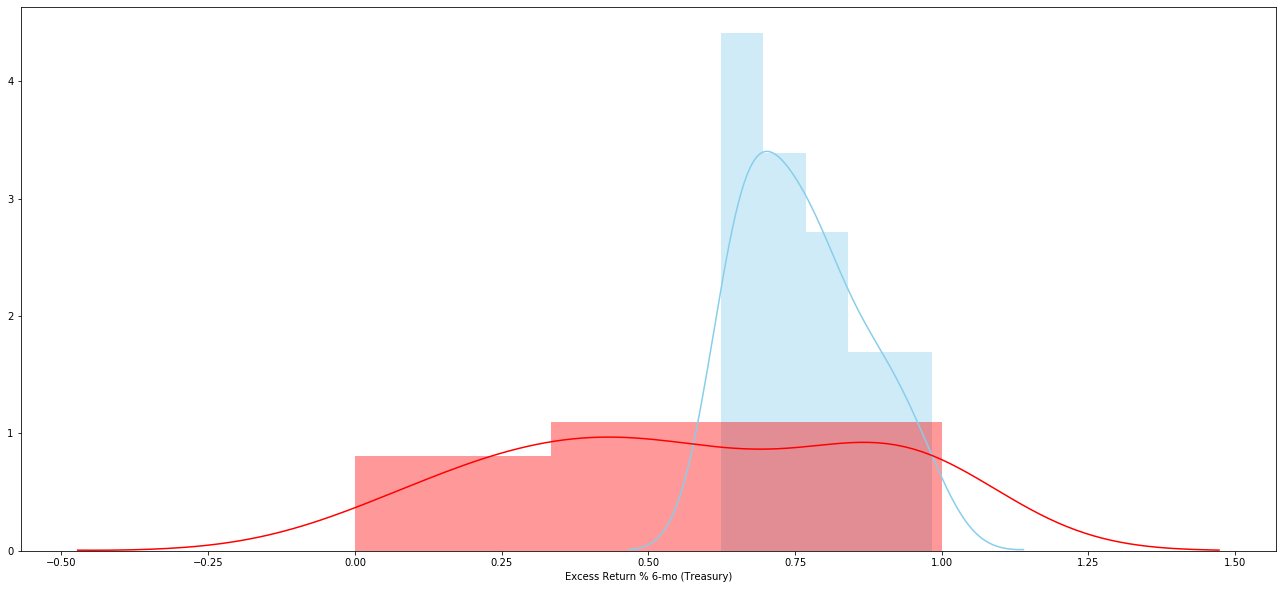

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 6-mo (Agg)  41.0  0.479309  0.351835  0.054947   0.368256   
 2                    combined  82.0  0.621577  0.294709  0.032545   0.556822   
 
    Interval  
 0  0.796339  
 1  0.590362  
 2  0.686332  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.2845
 1                             Degrees of freedom =   80.0000
 2                                              t =    4.9700
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.0977
 7                                      Hedge's g =    1.0874
 8                                  Glass's delta =    

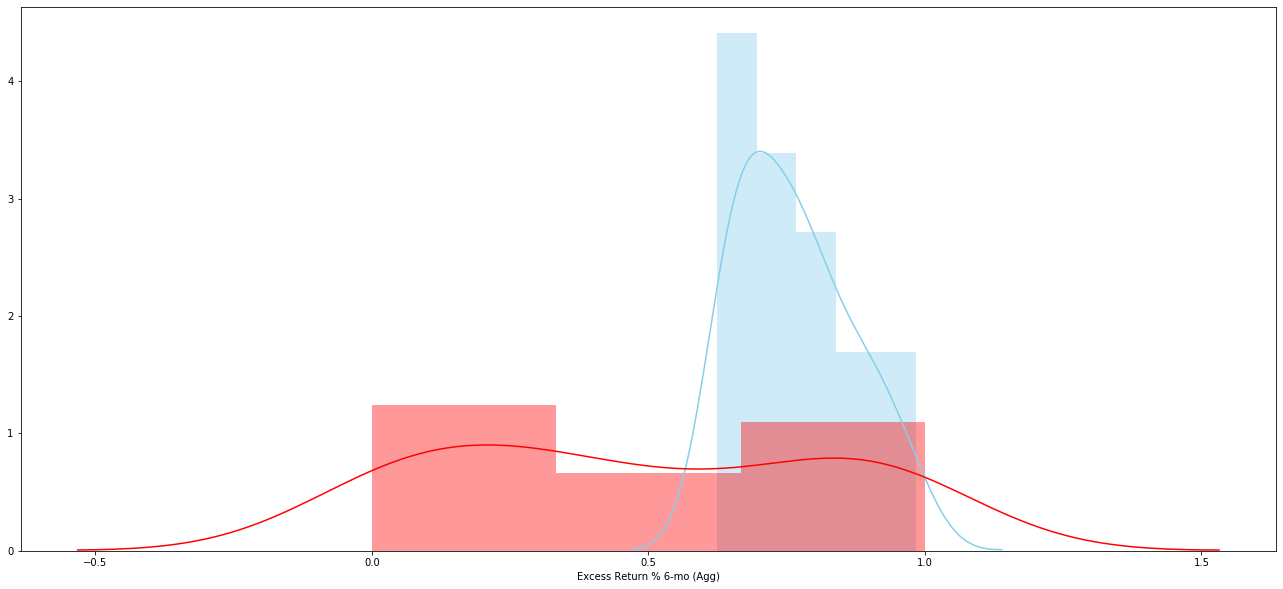

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 9-mo (Treasury)  41.0  0.570996  0.274512  0.042872   
 2                         combined  82.0  0.667421  0.227727  0.025148   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.484349  0.657643  
 2   0.617384  0.717458  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1928
 1                              Degrees of freedom =   80.0000
 2                                               t =    4.2119
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.9302
 7                                       Hedge's g =    0.9215
 8                        

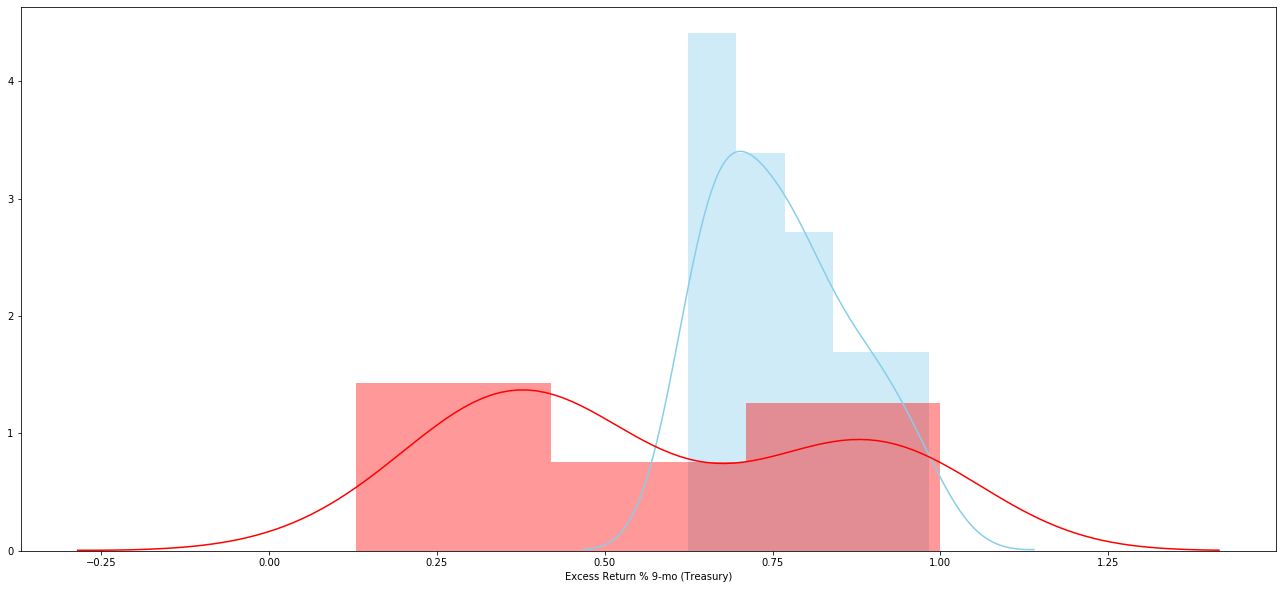

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 9-mo (Agg)  41.0  0.462457  0.318317  0.049713   0.361984   
 2                    combined  82.0  0.613151  0.279750  0.030893   0.551684   
 
    Interval  
 0  0.796339  
 1  0.562931  
 2  0.674619  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.3014
 1                             Degrees of freedom =   80.0000
 2                                              t =    5.7684
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.2740
 7                                      Hedge's g =    1.2620
 8                                  Glass's delta =    

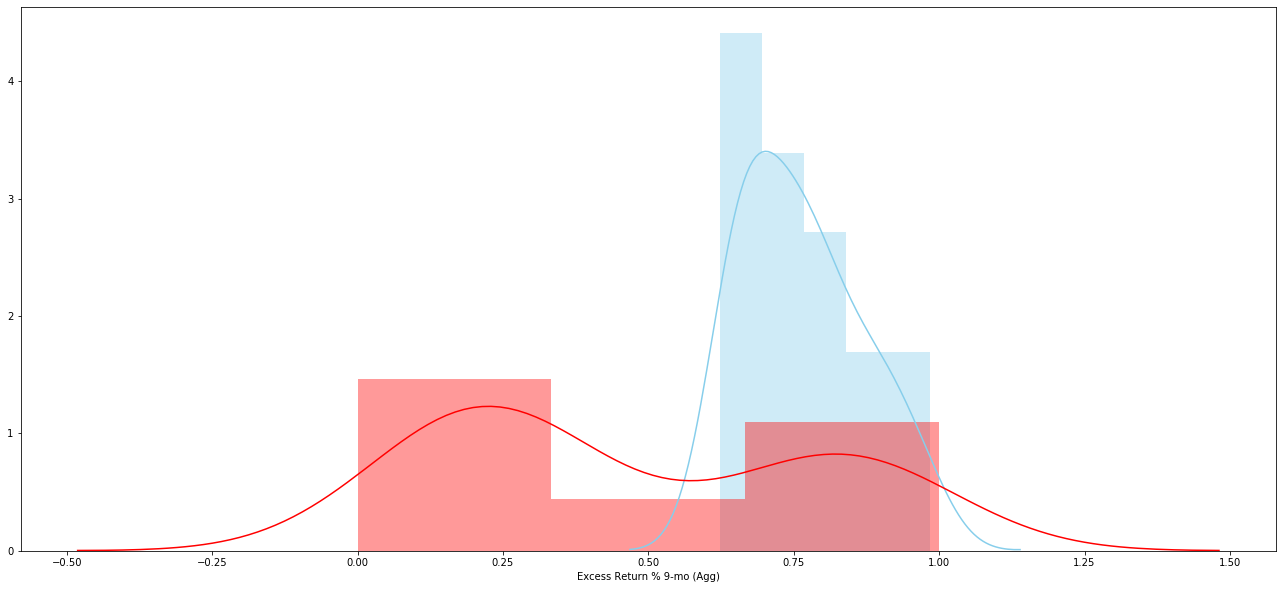

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 12-mo (Treasury)  41.0  0.571975  0.280363  0.043785   
 2                          combined  82.0  0.667910  0.231013  0.025511   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.483482  0.660469  
 2   0.617151  0.718670  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.1919
 1                              Degrees of freedom =   80.0000
 2                                               t =    4.1135
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    0.9085
 7                                       Hedge's g =    0.9000
 8                    

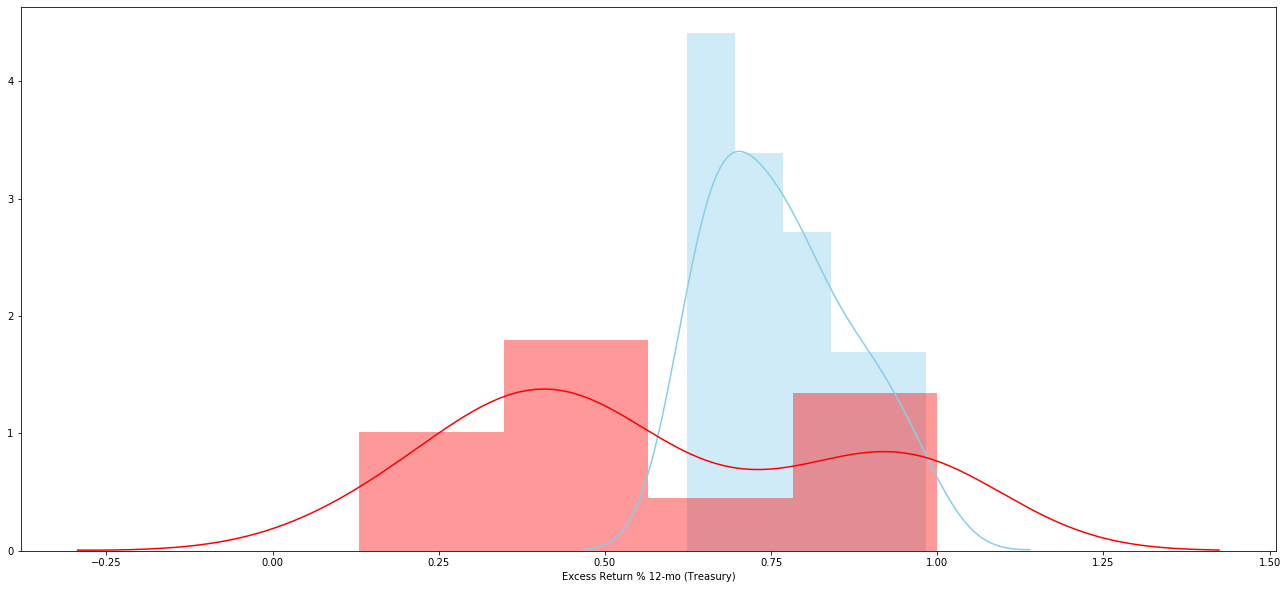

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 12-mo (Agg)  41.0  0.438932  0.339490  0.053019   0.331775   
 2                     combined  82.0  0.601389  0.298106  0.032920   0.535888   
 
    Interval  
 0  0.796339  
 1  0.546088  
 2  0.666890  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.3249
 1                              Degrees of freedom =   80.0000
 2                                               t =    5.8645
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.2953
 7                                       Hedge's g =    1.2831
 8                                   Glass

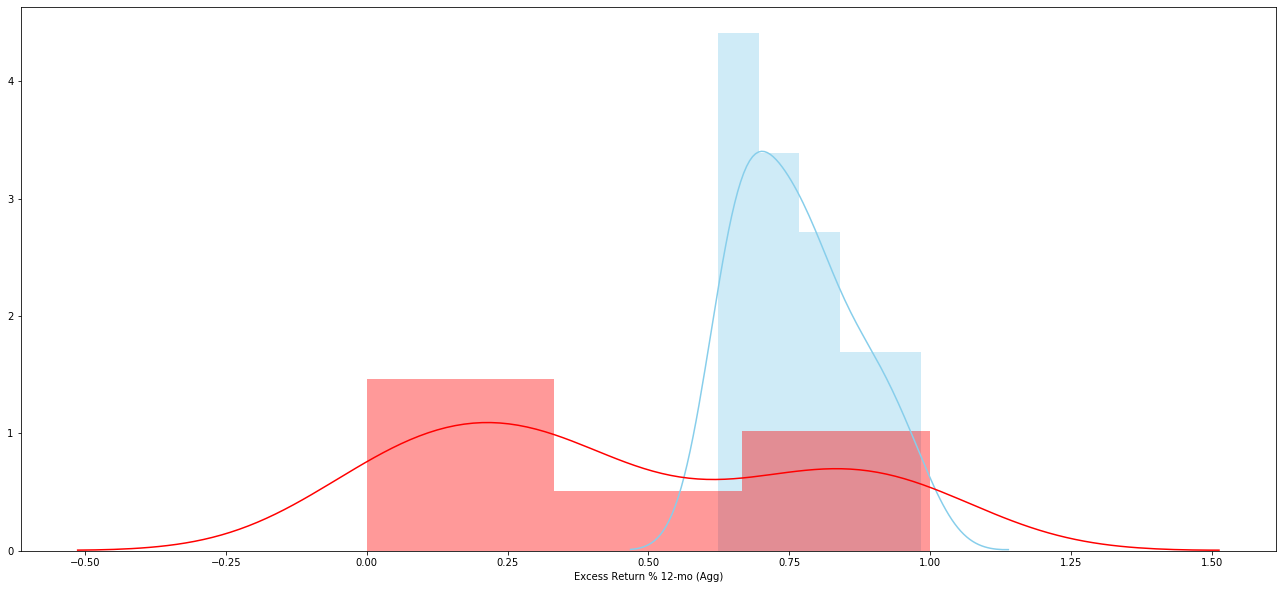

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 24-mo (Treasury)  41.0  0.555360  0.240661  0.037585   
 2                          combined  82.0  0.659603  0.211744  0.023383   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.479398  0.631322  
 2   0.613077  0.706128  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2085
 1                              Degrees of freedom =   80.0000
 2                                               t =    5.1000
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.1264
 7                                       Hedge's g =    1.1158
 8                    

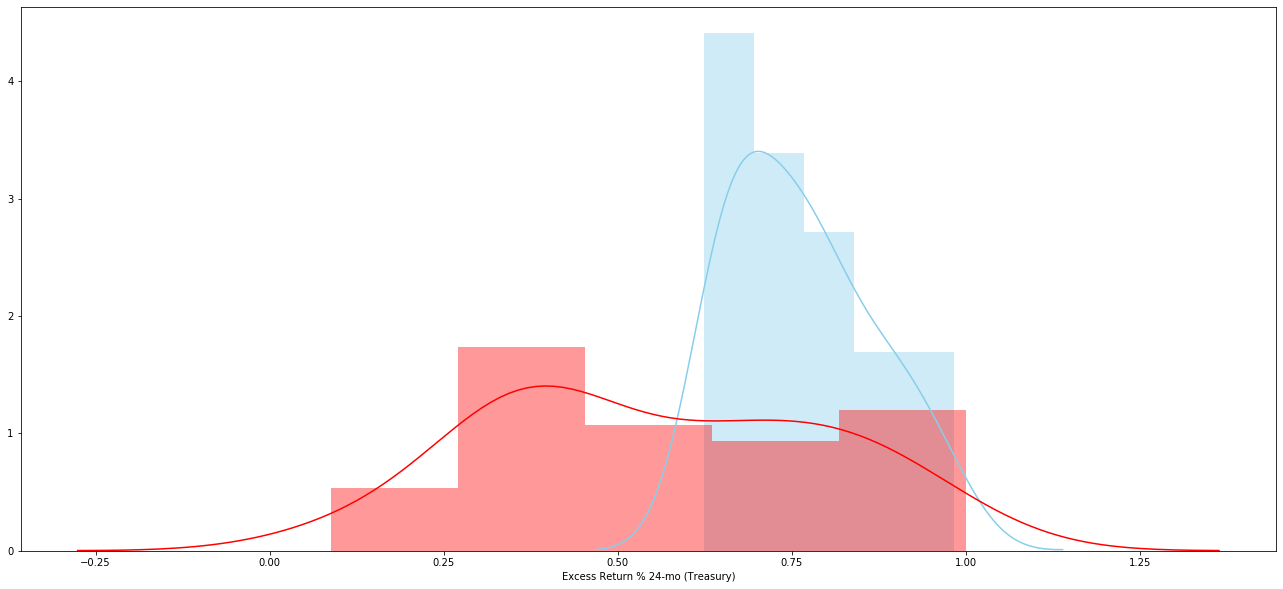

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 24-mo (Agg)  41.0  0.377734  0.357633  0.055853   0.264851   
 2                     combined  82.0  0.570790  0.325769  0.035975   0.499210   
 
    Interval  
 0  0.796339  
 1  0.490617  
 2  0.642369  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.3861
 1                              Degrees of freedom =   80.0000
 2                                               t =    6.6432
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.4672
 7                                       Hedge's g =    1.4534
 8                                   Glass

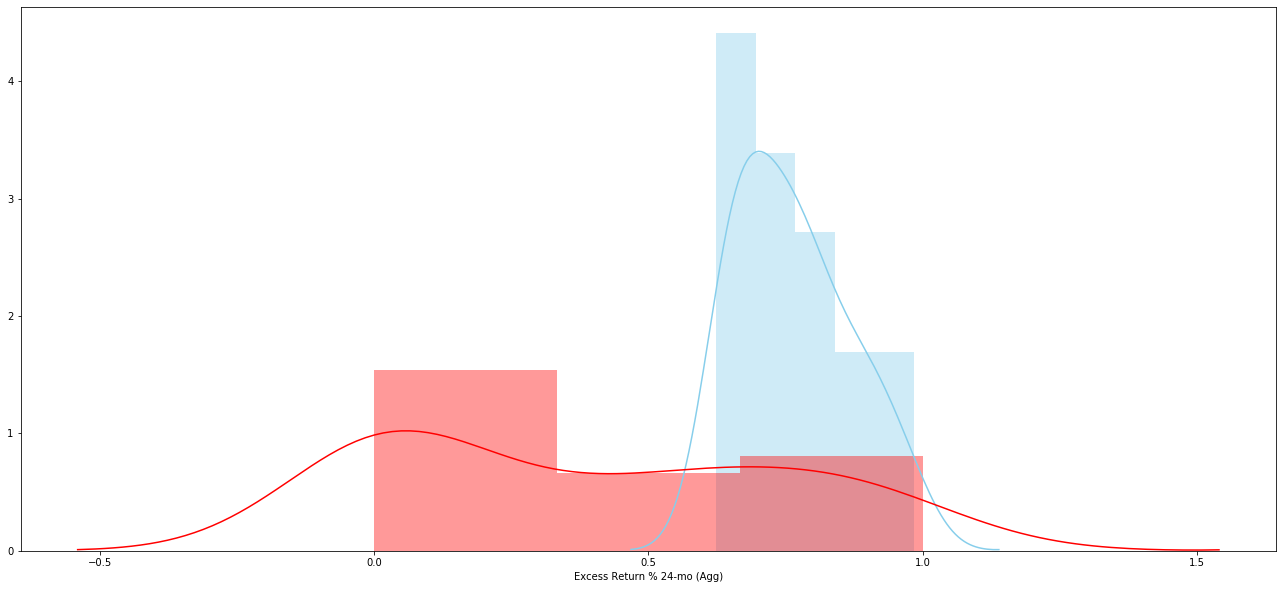

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 36-mo (Treasury)  41.0  0.633219  0.273980  0.042789   
 2                          combined  82.0  0.698532  0.215919  0.023844   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.546741  0.719698  
 2   0.651090  0.745975  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.1306
 1                              Degrees of freedom =   80.0000
 2                                               t =    2.8578
 3                           Two side test p value =    0.0054
 4                          Difference < 0 p value =    0.9973
 5                          Difference > 0 p value =    0.0027
 6                                       Cohen's d =    0.6312
 7                                       Hedge's g =    0.6252
 8                    

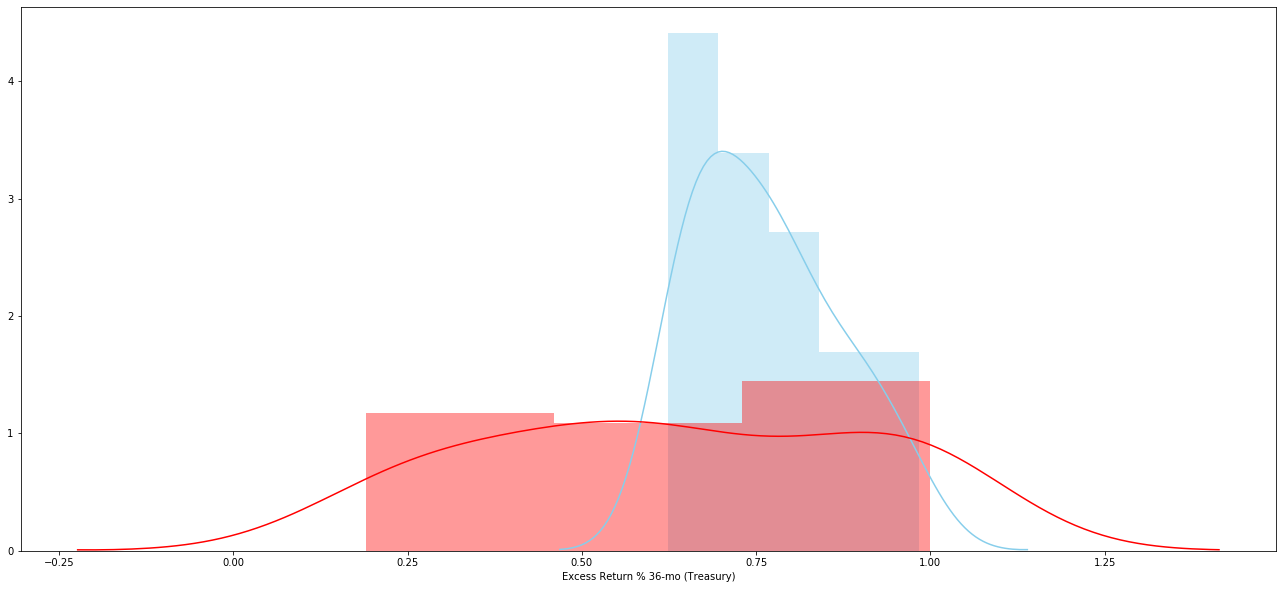

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 36-mo (Agg)  41.0  0.407947  0.349516  0.054585   0.297627   
 2                     combined  82.0  0.585896  0.312437  0.034503   0.517246   
 
    Interval  
 0  0.796339  
 1  0.518268  
 2  0.654546  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.3559
 1                              Degrees of freedom =   80.0000
 2                                               t =    6.2544
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3814
 7                                       Hedge's g =    1.3684
 8                                   Glass

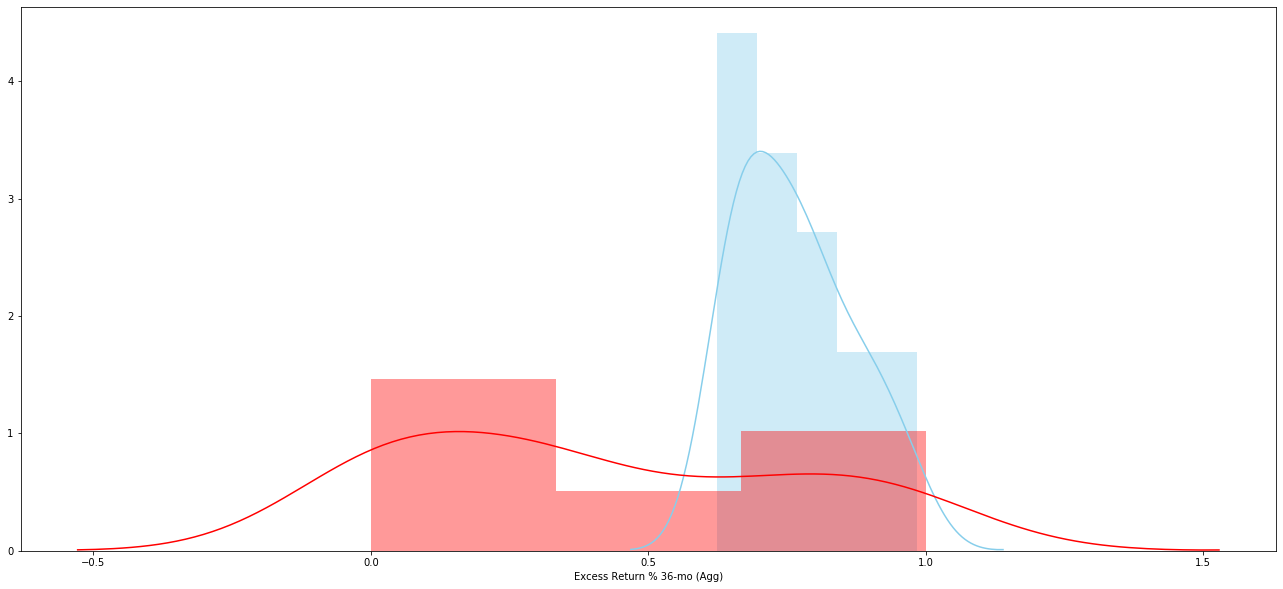

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,256.000000,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.498948,0.495798,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.218167,0.231360,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.508152,0.508637,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 3-mo (Treasury)  254.0  0.497792  0.209246  0.013129   
 2                         combined  295.0  0.534769  0.218218  0.012705   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.471936  0.523649  
 2   0.509765  0.559774  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2661
 1                              Degrees of freedom =   293.0000
 2                                               t =     7.9786
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3429
 7                                       Hedge's g =     1.3394
 8           

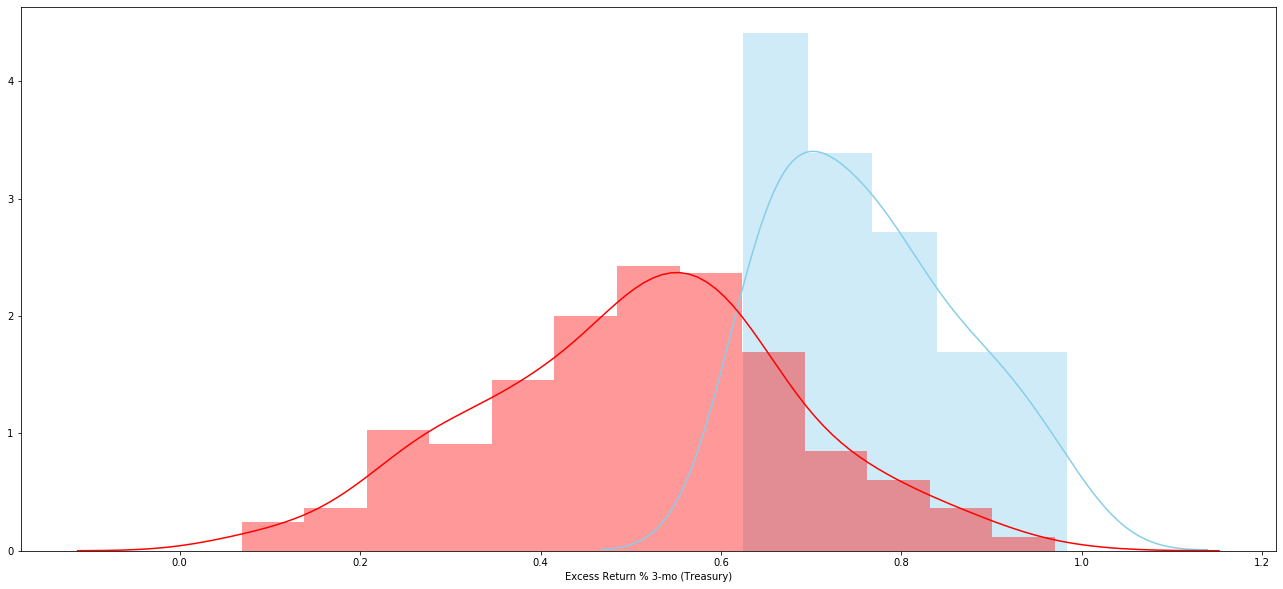

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 3-mo (Agg)  254.0  0.493628  0.211150  0.013249   0.467536   
 2                    combined  295.0  0.531184  0.220400  0.012832   0.505929   
 
    Interval  
 0  0.796339  
 1  0.519720  
 2  0.556438  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2702
 1                             Degrees of freedom =   293.0000
 2                                              t =     8.0331
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3520
 7                                      Hedge's g =     1.3486
 8                                  Glass'

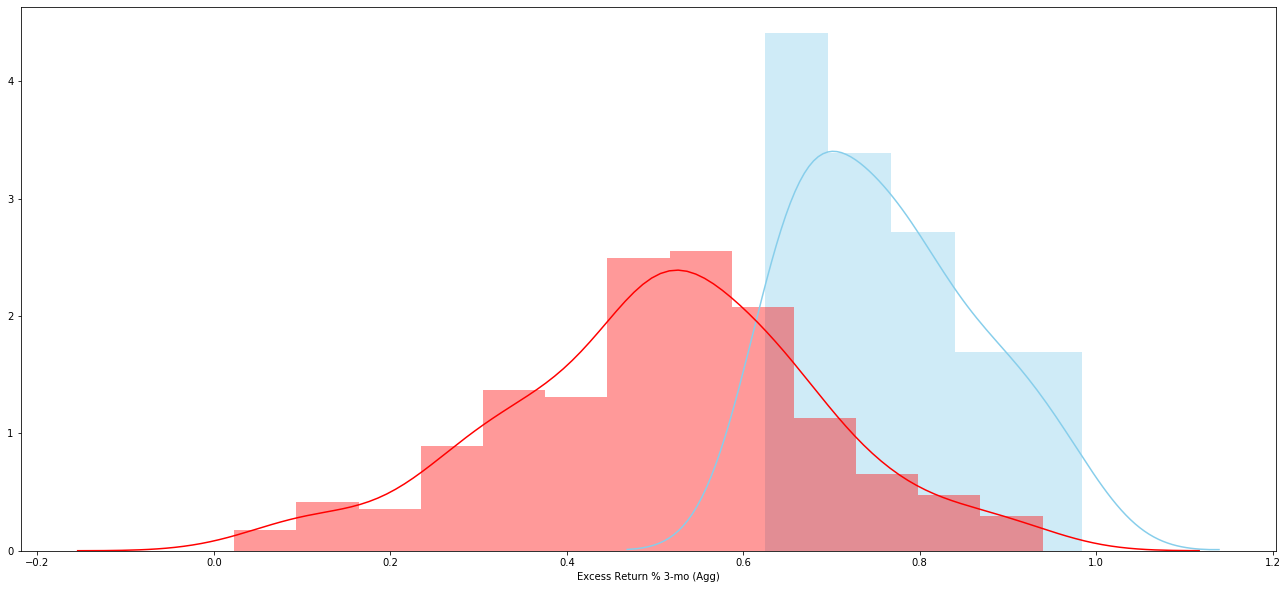

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 6-mo (Treasury)  251.0  0.511375  0.233158  0.014717   
 2                         combined  292.0  0.546824  0.236389  0.013834   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.482390  0.540359  
 2   0.519598  0.574051  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2525
 1                              Degrees of freedom =   290.0000
 2                                               t =     6.8180
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1485
 7                                       Hedge's g =     1.1455
 8           

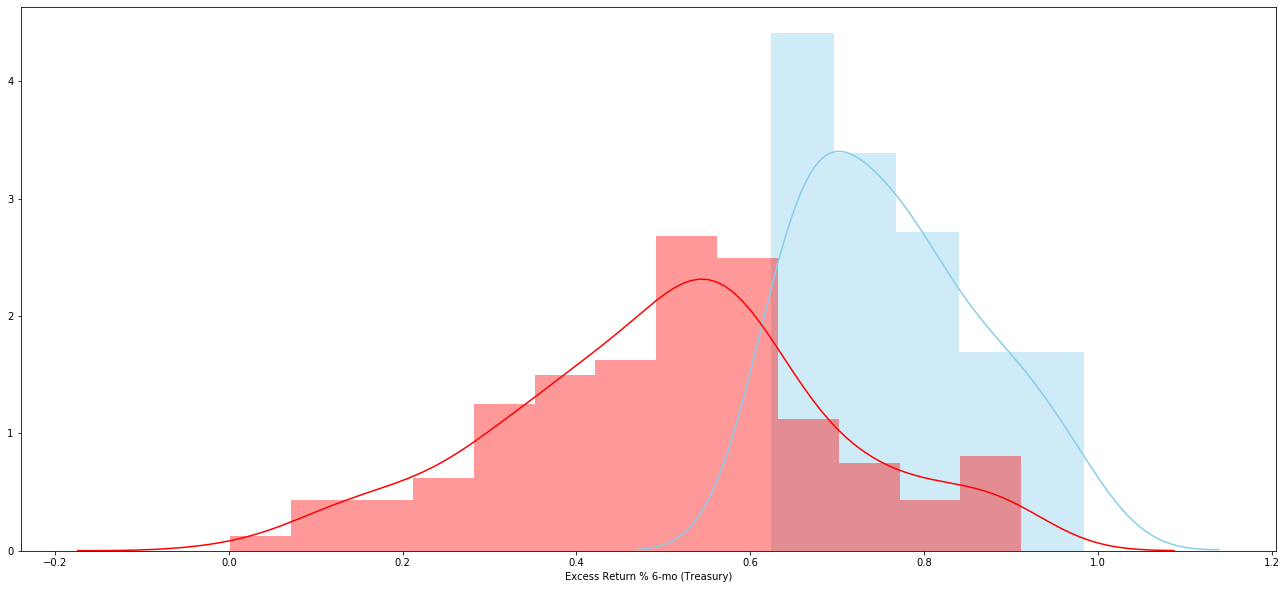

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 6-mo (Agg)  251.0  0.500867  0.229447  0.014483   0.472343   
 2                    combined  292.0  0.537792  0.234651  0.013732   0.510765   
 
    Interval  
 0  0.796339  
 1  0.529390  
 2  0.564818  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2630
 1                             Degrees of freedom =   290.0000
 2                                              t =     7.2131
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2150
 7                                      Hedge's g =     1.2119
 8                                  Glass'

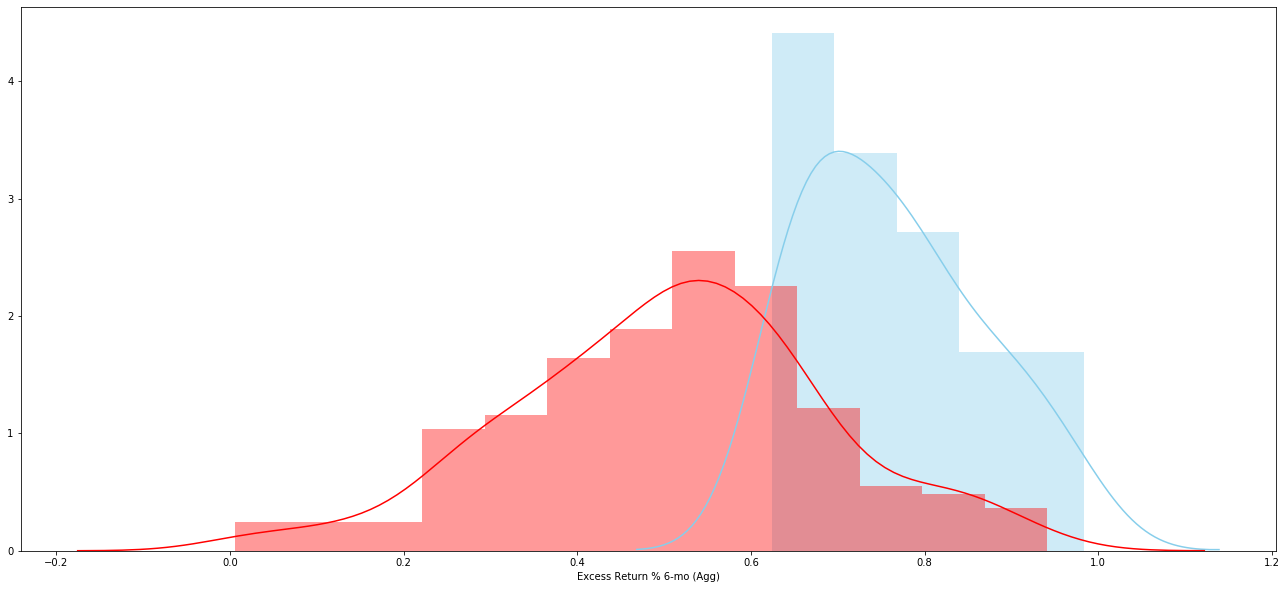

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 9-mo (Treasury)  248.0  0.512766  0.213667  0.013568   
 2                         combined  289.0  0.548386  0.219836  0.012932   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.486042  0.539489  
 2   0.522934  0.573838  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2511
 1                              Degrees of freedom =   287.0000
 2                                               t =     7.3760
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2435
 7                                       Hedge's g =     1.2403
 8           

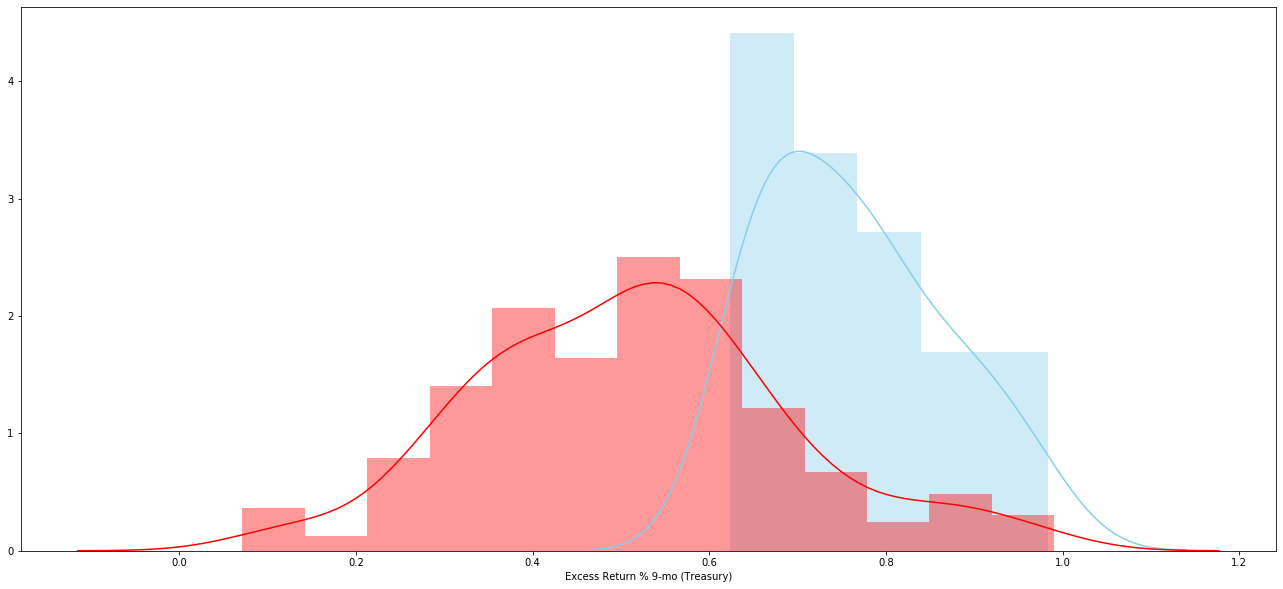

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   41.0  0.763845  0.102946  0.016077   0.731352   
 1  Excess Return % 9-mo (Agg)  248.0  0.497830  0.212037  0.013464   0.471310   
 2                    combined  289.0  0.535569  0.220627  0.012978   0.510025   
 
    Interval  
 0  0.796339  
 1  0.524350  
 2  0.561113  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2660
 1                             Degrees of freedom =   287.0000
 2                                              t =     7.8726
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3272
 7                                      Hedge's g =     1.3238
 8                                  Glass'

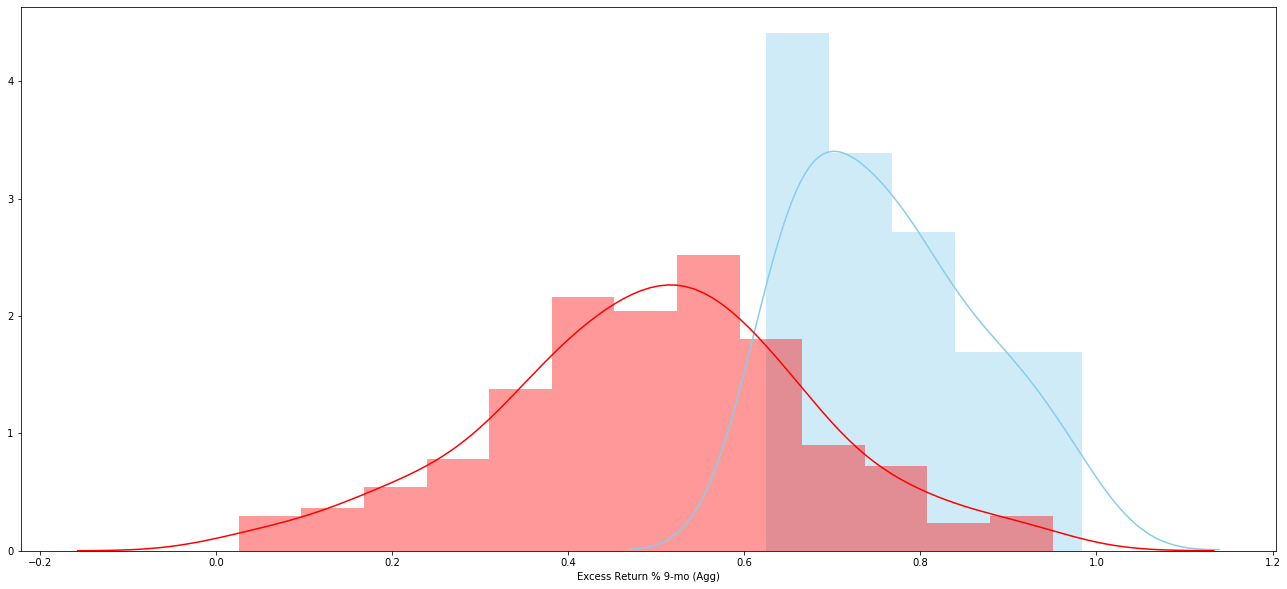

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 12-mo (Treasury)  245.0  0.507787  0.227149  0.014512   
 2                          combined  286.0  0.544495  0.231822  0.013708   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.479203  0.536372  
 2   0.517513  0.571477  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2561
 1                              Degrees of freedom =   284.0000
 2                                               t =     7.0891
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1962
 7                                       Hedge's g =     1.1930
 8       

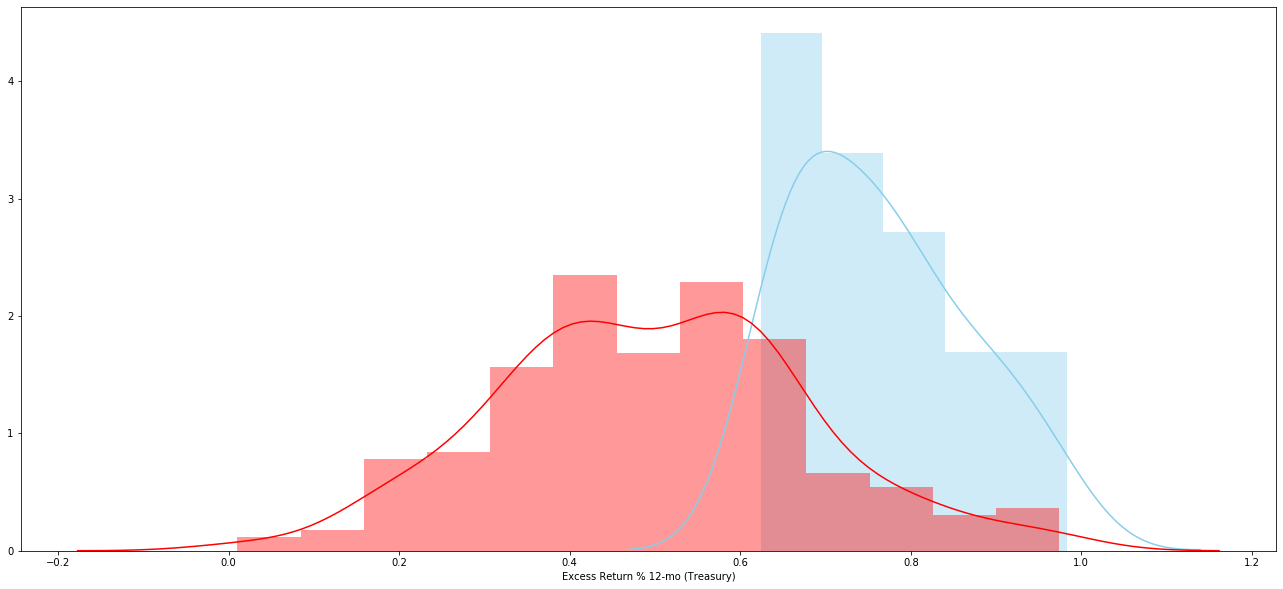

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 12-mo (Agg)  245.0  0.495017  0.227807  0.014554   
 2                     combined  286.0  0.533555  0.234145  0.013845   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.466349  0.523684  
 2   0.506303  0.560807  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2688
 1                              Degrees of freedom =   284.0000
 2                                               t =     7.4219
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2523
 7                                       Hedge's g =     1.2490
 8                           

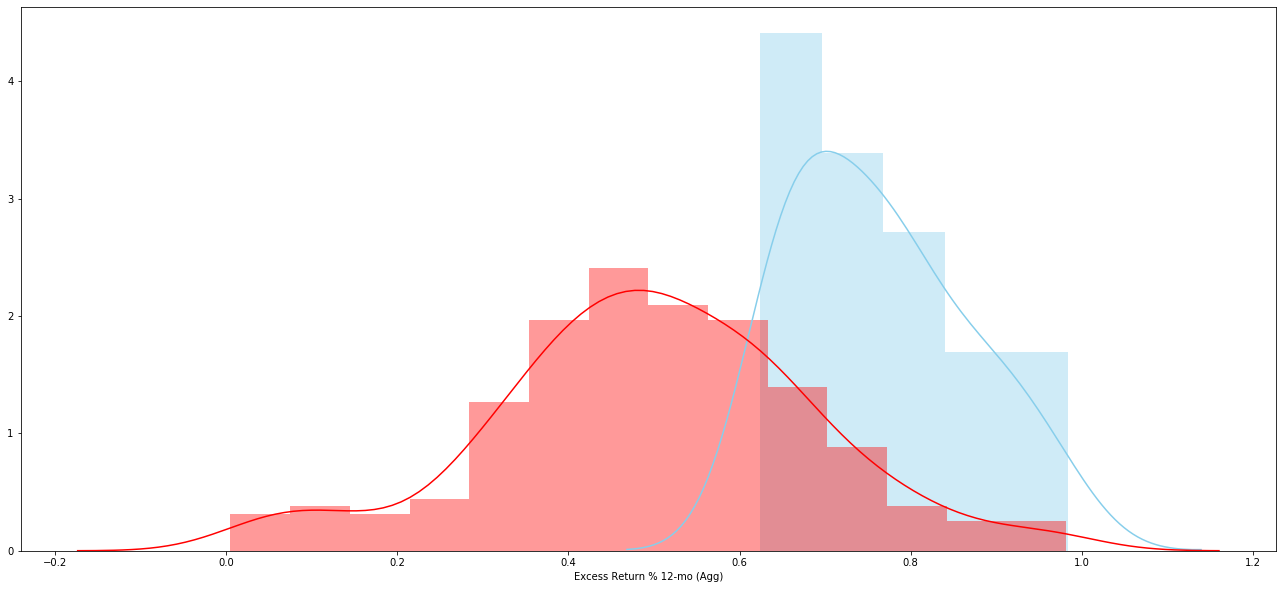

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 24-mo (Treasury)  233.0  0.500095  0.200797  0.013155   
 2                          combined  274.0  0.539561  0.211426  0.012773   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.474177  0.526013  
 2   0.514416  0.564707  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2638
 1                              Degrees of freedom =   272.0000
 2                                               t =     8.2138
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3911
 7                                       Hedge's g =     1.3872
 8       

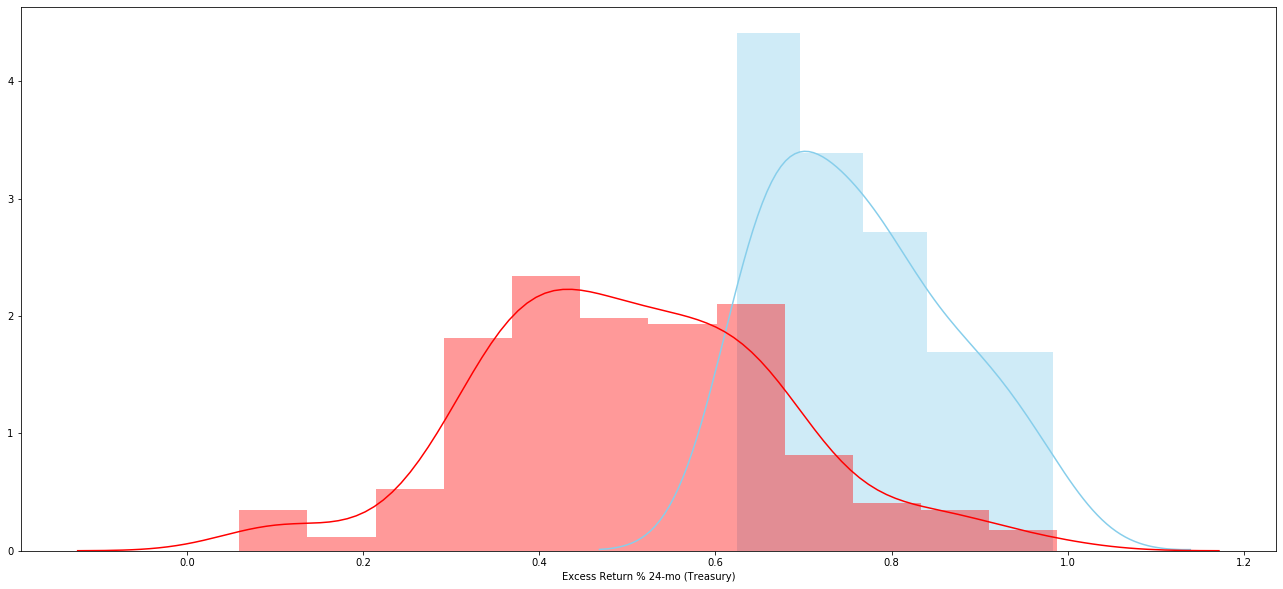

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 24-mo (Agg)  233.0  0.487434  0.234734  0.015378   
 2                     combined  274.0  0.528795  0.241112  0.014566   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.457135  0.517732  
 2   0.500118  0.557471  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2764
 1                              Degrees of freedom =   272.0000
 2                                               t =     7.4068
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2544
 7                                       Hedge's g =     1.2509
 8                           

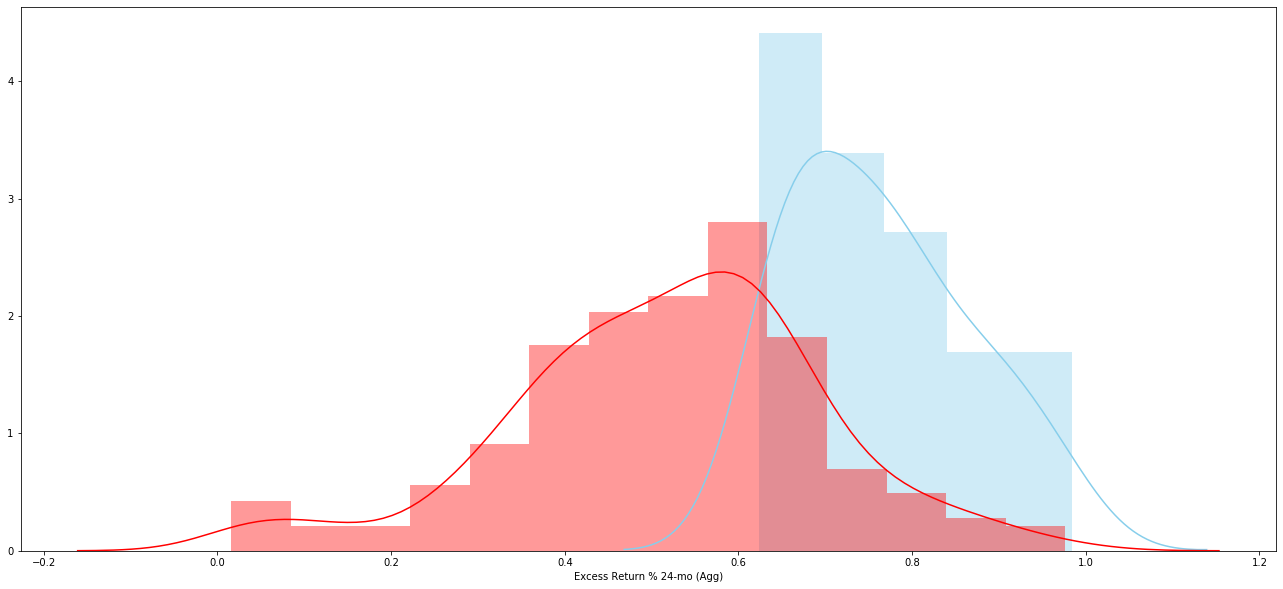

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 36-mo (Treasury)  221.0  0.504781  0.244943  0.016477   
 2                          combined  262.0  0.545322  0.247162  0.015270   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.472309  0.537254  
 2   0.515254  0.575389  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2591
 1                              Degrees of freedom =   260.0000
 2                                               t =     6.6557
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1318
 7                                       Hedge's g =     1.1285
 8       

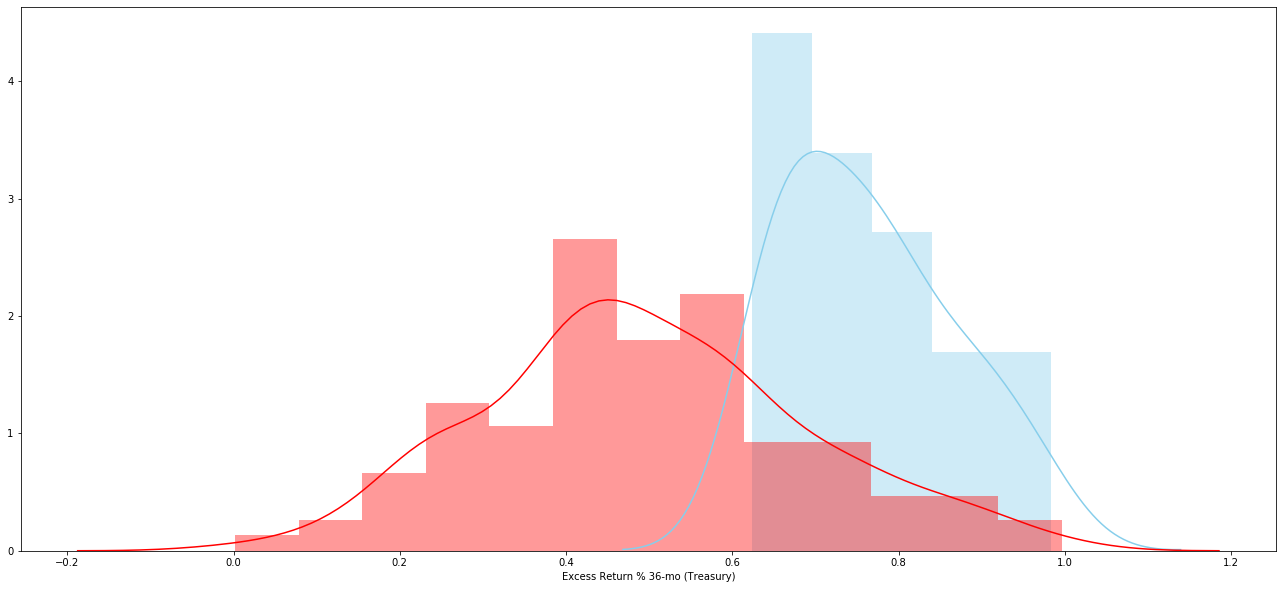

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   41.0  0.763845  0.102946  0.016077   
 1  Excess Return % 36-mo (Agg)  221.0  0.497593  0.232889  0.015666   
 2                     combined  262.0  0.539259  0.238190  0.014715   
 
    95% Conf.  Interval  
 0   0.731352  0.796339  
 1   0.466719  0.528467  
 2   0.510282  0.568235  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2663
 1                              Degrees of freedom =   260.0000
 2                                               t =     7.1825
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2213
 7                                       Hedge's g =     1.2178
 8                           

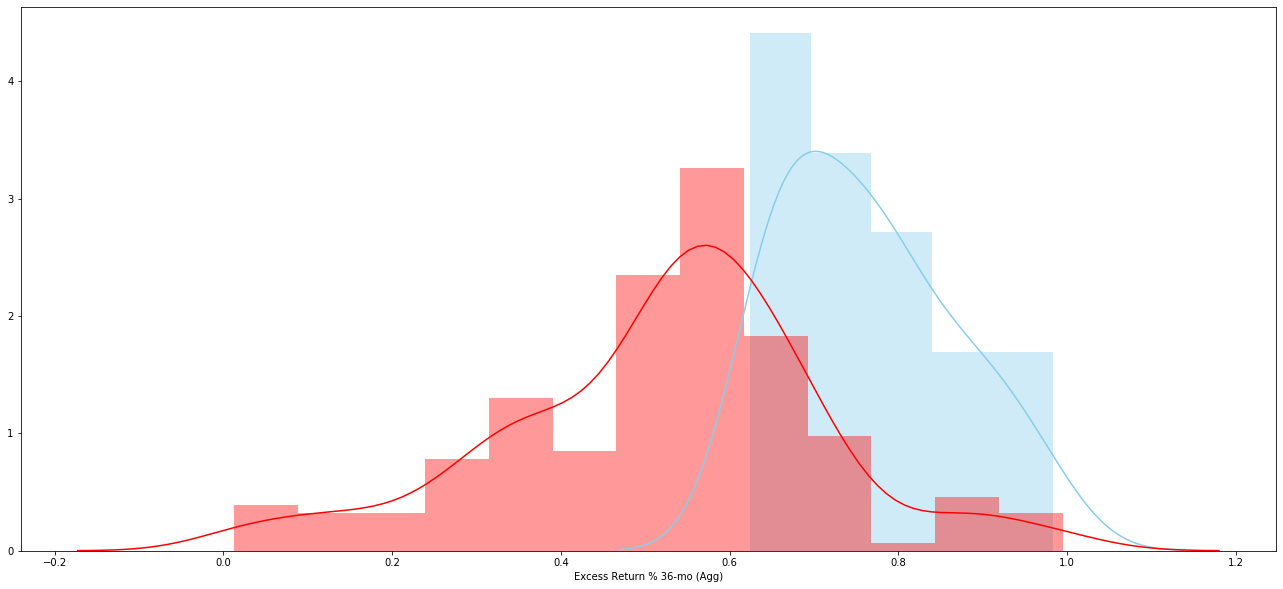

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")